# week1

In [4]:
import pandas as pd


df = pd.read_csv("Indian_Kids_Screen_Time.csv")

# Check if there are any missing values
df.isnull().values.any()

# count missing values in each column
df.isnull().sum()

,0
Age,0
Gender,0
Avg_Daily_Screen_Time_hr,0
Primary_Device,0
Exceeded_Recommended_Limit,0
Educational_to_Recreational_Ratio,0
Health_Impacts,3218
Urban_or_Rural,0


In [6]:
# Check for duplicate rows
duplicates = df.duplicated()

duplicates

,0
0,False
1,False
2,False
3,False
4,False
...,...
9707,False
9708,False
9709,False
9710,False


In [5]:
# information about the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [7]:
print("First 5 rows:")
df.head()

First 5 rows:


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [ ]:
df.describe(include='all')

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
count,9712.000000,9712,9712.000000,9712,9712,9712.000000,6494,9712
unique,NaN,2,NaN,4,2,NaN,15,2
top,NaN,Male,NaN,Smartphone,True,NaN,Poor Sleep,Urban
freq,NaN,4942,NaN,4568,8301,NaN,2268,6851
mean,12.979201,NaN,4.352837,NaN,NaN,0.427226,NaN,NaN
std,3.162437,NaN,1.718232,NaN,NaN,0.073221,NaN,NaN
min,8.000000,NaN,0.000000,NaN,NaN,0.300000,NaN,NaN
25%,10.000000,NaN,3.410000,NaN,NaN,0.370000,NaN,NaN
50%,13.000000,NaN,4.440000,NaN,NaN,0.430000,NaN,NaN
75%,16.000000,NaN,5.380000,NaN,NaN,0.480000,NaN,NaN


In [ ]:
df['Health_Impacts'].isnull().value_counts()

,count
Health_Impacts,
False,6494
True,3218


In [8]:
df.dtypes

,0
Age,int64
Gender,object
Avg_Daily_Screen_Time_hr,float64
Primary_Device,object
Exceeded_Recommended_Limit,bool
Educational_to_Recreational_Ratio,float64
Health_Impacts,object
Urban_or_Rural,object


In [9]:
df['Health_Impacts'].isnull().value_counts()

,count
Health_Impacts,
False,6494
True,3218


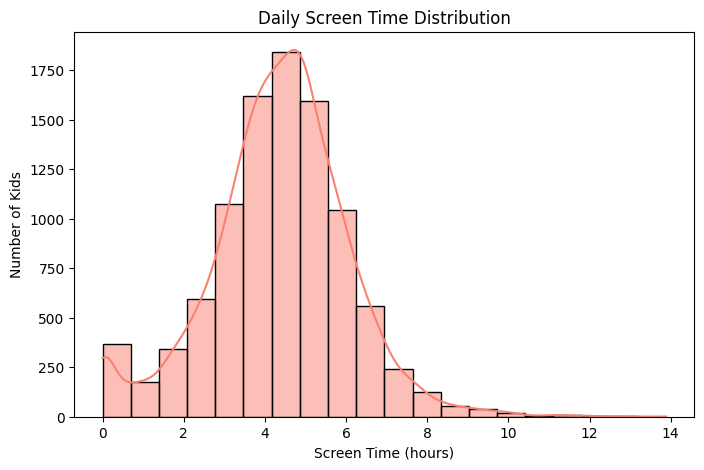

In [11]:
# 2. Average Daily Screen Time
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df['Avg_Daily_Screen_Time_hr'], bins=20, kde=True, color="salmon")
plt.title("Daily Screen Time Distribution")
plt.xlabel("Screen Time (hours)")
plt.ylabel("Number of Kids")
plt.show()

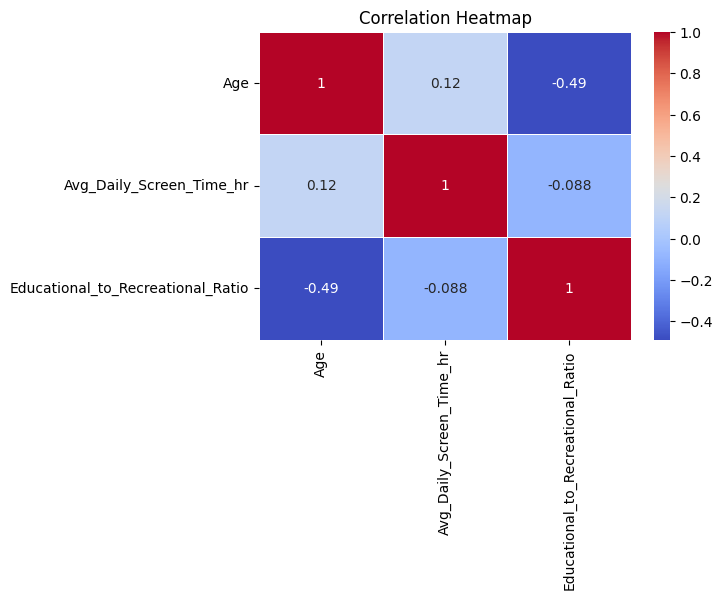

In [12]:
#heat map
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(),
           annot=True,  cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Missing Data Health Impacts column. This column has a large number of missing values (3218 entries missing), which is something we need to explore further.

1,Age Distribution
Kids are between 8 and 18 years old.

Most students fall in the 12 to 16 age range. 2. Daily Screen Time

Some kids spend up to 14 hours/day on screens.

The majority are above the recommended healthy limit

2.Gender Distribution
Slightly more males (4942) than females (4770)

Both groups have similar screen time patterns.

3.Primary Device Used
Smartphones dominate

Other devices: Tablets, Laptops, and TVs, but far less frequent.

4.Exceeded Recommended Screen Time
85% of kids (8301 out of 9712) exceed safe daily screen time.

Only a small portion stays within healthy limits. 6. Health Impacts

Poor Sleep (highest)

Eye Strain

Headaches

5.Reduced Physical Activity

Urban vs Rural Distribution
More kids are from Urban areas (≈ 70%) than Rural.

Indicates higher screen time exposure in urban populations



## week2

In [ ]:
#replacing none values with "no health issues"
df['Health_Impacts'] = df['Health_Impacts'].fillna("No health issues")
print(df['Health_Impacts'].value_counts())


Health_Impacts
No health issues                                 3218
Poor Sleep                                       2268
Poor Sleep, Eye Strain                            979
Eye Strain                                        644
Poor Sleep, Anxiety                               608
Poor Sleep, Obesity Risk                          452
Anxiety                                           385
Poor Sleep, Eye Strain, Anxiety                   258
Obesity Risk                                      252
Poor Sleep, Eye Strain, Obesity Risk              188
Eye Strain, Anxiety                               135
Eye Strain, Obesity Risk                          106
Poor Sleep, Anxiety, Obesity Risk                  78
Anxiety, Obesity Risk                              69
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      37
Eye Strain, Anxiety, Obesity Risk                  35
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Define bins and labels
bins = [7, 12, 15, 18]
labels = ["Pre-Teens (7-12)", "Teenagers (13-15)", "Late Teens (16-18)"]

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

print(df[['Age', 'Age_Group']])


      Age           Age_Group
0      14   Teenagers (13-15)
1      11    Pre-Teens (7-12)
2      18  Late Teens (16-18)
3      15   Teenagers (13-15)
4      12    Pre-Teens (7-12)
...   ...                 ...
9707   17  Late Teens (16-18)
9708   17  Late Teens (16-18)
9709   16  Late Teens (16-18)
9710   17  Late Teens (16-18)
9711   15   Teenagers (13-15)

[9712 rows x 2 columns]


In [ ]:
df['Health_Impacts'].isnull().sum()
df.isnull().sum()


,0
Age,0
Gender,0
Avg_Daily_Screen_Time_hr,0
Primary_Device,0
Exceeded_Recommended_Limit,0
Educational_to_Recreational_Ratio,0
Health_Impacts,0
Urban_or_Rural,0
Age_Group,0


In [ ]:
print(df.columns.tolist())


['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device', 'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio', 'Health_Impacts', 'Urban_or_Rural', 'Age_Group']


In [ ]:

df['Health_Impacts'] = df['Health_Impacts'].astype(str).str.strip().str.lower()

# Mapping dictionary
health_map = {
    "eye strain": "Physical",
    "headache": "Physical",
    "obesity": "Physical",
    "neck pain": "Physical",
    "back pain": "Physical",
    "poor posture": "Physical",
    "fatigue": "Physical",


    "anxiety": "Mental",
    "depression": "Mental",
    "stress": "Mental",
    "poor sleep": "Mental",
    "reduced attention span": "Mental",
     "addiction": "Mental",
    "no health issues": "None",
    "none": "None",
    "no issue": "None",
    "no issues": "None"
}

# Apply mapping
df['Health_Category'] = df['Health_Impacts'].map(health_map)







In [ ]:
# --- 3. Create summary table (cross-tabulation) ---
summary = pd.crosstab(df['Age_Group'], df['Health_Category'])

summary

Health_Category,Mental,None,Physical
Age_Group,,,
Pre-Teens (7-12),1103,1795,257
Teenagers (13-15),776,723,187
Late Teens (16-18),774,700,200


In [ ]:
df['Health_Impacts'].isnull().sum()
df.isnull().sum()


,0
Age,0
Gender,0
Avg_Daily_Screen_Time_hr,0
Primary_Device,0
Exceeded_Recommended_Limit,0
Educational_to_Recreational_Ratio,0
Health_Impacts,0
Urban_or_Rural,0
Age_Group,0
Health_Category,3197


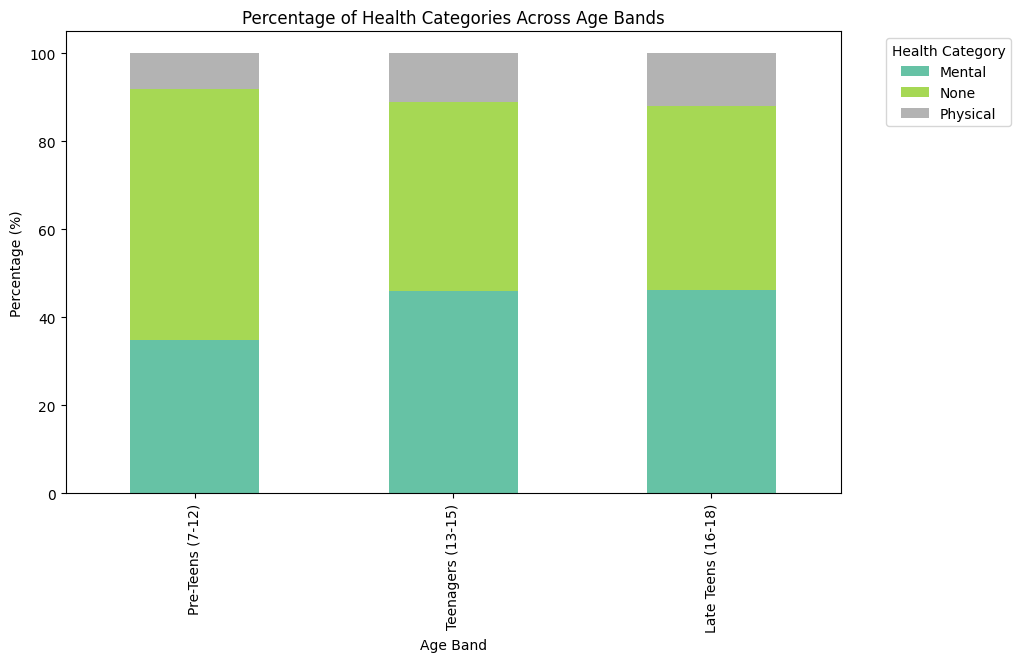

In [ ]:
import matplotlib.pyplot as plt

# Calculate percentages
pivot_percent = summary.div(summary.sum(axis=1), axis=0) * 100

pivot_percent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("Percentage of Health Categories Across Age Bands")
plt.ylabel("Percentage (%)")
plt.xlabel("Age Band")
plt.legend(title='Health Category', bbox_to_anchor=(1.05, 1))
plt.show()

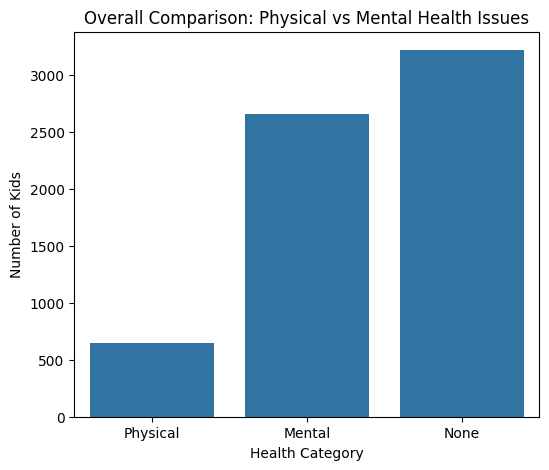

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Health_Category', order=['Physical','Mental','None'])
plt.title("Overall Comparison: Physical vs Mental Health Issues")
plt.xlabel("Health Category")
plt.ylabel("Number of Kids")
plt.show()


In [ ]:
import pandas as pd

# --- 1. Categorize Primary Device based on Screen Size ---
# Example device-to-size mapping (in inches)
device_screen_size = {
    "Smartphone": 7,
    "Tablet": 12,
    "Laptop": 22,
    "TV": 40
}
# Map screen sizes
df['Device_Size'] = df['Primary_Device'].map(device_screen_size)
# Categorize devices: Small (<30") vs Large (>30")
df['Device_Category'] = df['Device_Size'].apply(lambda x: "Small Screen (<30\")" if x < 30 else "Large Screen (>30\")")

# --- 2. Categorize Screen Time ---
# Example thresholds (adjust as needed):
# Low: <2 hrs, Medium: 2–5 hrs, High: >5 hrs
def categorize_screen_time(hours):
    if hours < 2:
        return "Low Screen Time"
    elif 2 <= hours <= 5:
        return "Medium Screen Time"
    else:
        return "High Screen Time"

df['Screen_Time_Category'] = df['Avg_Daily_Screen_Time_hr'].apply(categorize_screen_time)

# --- 3. Check results ---
df[['Primary_Device', 'Device_Size', 'Device_Category', 'Avg_Daily_Screen_Time_hr', 'Screen_Time_Category']].head()


,Primary_Device,Device_Size,Device_Category,Avg_Daily_Screen_Time_hr,Screen_Time_Category
0,Smartphone,7,"Small Screen (<30"")",3.99,Medium Screen Time
1,Laptop,22,"Small Screen (<30"")",4.61,Medium Screen Time
2,TV,40,"Large Screen (>30"")",3.73,Medium Screen Time
3,Laptop,22,"Small Screen (<30"")",1.21,Low Screen Time
4,Smartphone,7,"Small Screen (<30"")",5.89,High Screen Time


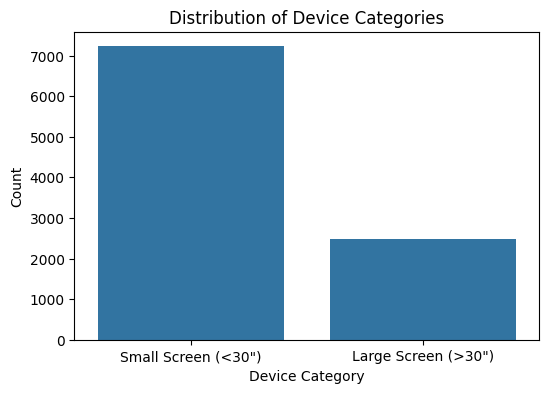

In [ ]:
# 1. Device Category Count
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Device_Category")
plt.title("Distribution of Device Categories")
plt.xlabel("Device Category")
plt.ylabel("Count")
plt.show()




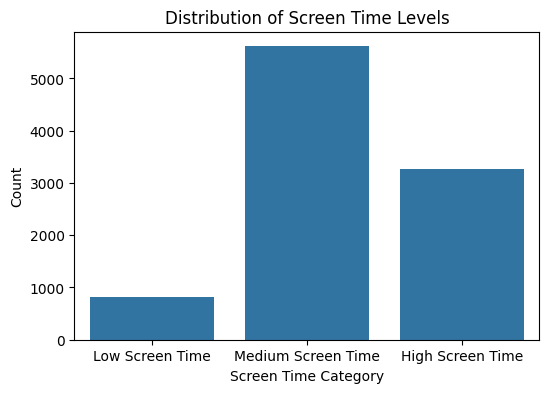

In [ ]:
# 2. Screen Time Category Count
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Screen_Time_Category", order=["Low Screen Time", "Medium Screen Time", "High Screen Time"])
plt.title("Distribution of Screen Time Levels")
plt.xlabel("Screen Time Category")
plt.ylabel("Count")
plt.show()


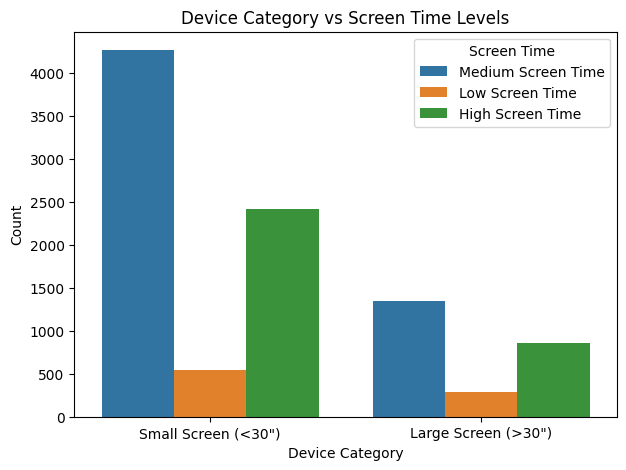

In [ ]:
# 3. Stacked Bar – Device vs Screen Time
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Device_Category", hue="Screen_Time_Category",
              order=["Small Screen (<30\")", "Large Screen (>30\")"])
plt.title("Device Category vs Screen Time Levels")
plt.xlabel("Device Category")
plt.ylabel("Count")
plt.legend(title="Screen Time")
plt.show()

# summary

1.Age Bands:

Pre-teens: 8 to 12 years

Teenagers: 13 to 16 years

Late Teens: 17 to 18 years

2.Health Categories:

i) Physical: Eye strain, Headache, Obesity, Back/Neck pain, Poor posture, Fatigue

ii) Mental: Poor sleep, Stress, Anxiety, Depression, Reduced attention span, Addiction

iii) None: No health issues



Mapped health impacts into Physical, Mental, or None



2.Insights from Graphs:

i)Pre-teens: mostly Physical health issues

ii)Teenagers: higher proportion of Mental health issues

iii)Late Teens: mixed Physical and Mental, some with No health issues

3.Benefits of Categorization:

i)Combines Age + Health Impact for meaningful analysis

ii)Helps identify which age group is most affected by each health issue

iii)Supports targeted recommendations and policy decisions
Device Categorization → Small (<30") vs Large (>30").

--->Most kids use Small screens (smartphones, laptops).

--->TVs fall in Large screen.

---->Screen Time Categorization → Low, Medium, High.

----->Majority fall in Medium screen time range.

---->Combined Insight →

---->Small screens dominate, with most users in medium usage.

---->Large screens (TV) are fewer, but often linked with higher usa